In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
df = pd.read_csv('Dataset1.CSV')


In [5]:
### Transformation des valeurs catégorielles en valeurs numériques

In [6]:
## On utilise l'encodage binaire uniquement sur les variables catégorielles binaires

In [7]:
from sklearn.preprocessing import OneHotEncoder

# Sélectionnez les colonnes catégorielles à encoder
categorical_columns = ["Sex", "Own_Prop","Mrt_St","Oth_Act", "Finantial_Guarantee","Type_Cult", "Area", "Active3month_past", "Proof_Act", "Morality"]

# Créez un encodeur binaire
encoder = OneHotEncoder(drop="first", sparse=False)

# Ajustez et transformez les données
# @@@ If you print out encoded_data, you will find that you have lost several of the 
# @@@ categorical columns.  You should find out why this is.
encoded_data = encoder.fit_transform(df[categorical_columns])

# Créez un DataFrame avec les nouvelles colonnes
# @@@ I had to change get_feature_names to get_feature_names_out.  You may need to update
# @@@ your scikit_learn
encoder_df = pd.DataFrame(encoded_data, columns = encoder. get_feature_names_out(categorical_columns))

# Concaténez le nouveau DataFrame encodé avec les autres colonnes non catégorielles
df_final = pd.concat([df.drop(categorical_columns, axis=1), encoder_df], axis=1)


In [8]:
## On change les types des nouvelles variables crées
df_final = df_final.astype({'Sex_MASCULIN' : int, 'Own_Prop_OUI' : int, 'Mrt_St_not married' : int, 'Active3month_past_OUI' : int, 'Proof_Act_OUI' : int, 'Morality_Mavaise' : int, 'Oth_Act_OUI' : int, 'Finantial_Guarantee_OUI' : int, 'Type_Cult_maraîchage' : int, 'Area_over 01ha' : int })

In [9]:
## Transformation de la variable cible en numérique (Encodage ordinal)
ordre4 = {
    'En souffrance' : 0,
    'En cours en souffrance' : 0,                 
    'En cours sains' : 1,           
    'Totalement remboursé sans difficultés': 1,
    'Totalement remboursé avec difficultés': 1
}
# Appliquer l'encodage ordinal

df_final['Current_Situation'] = df_final['Current_Situation'].map(ordre4)

In [10]:
## Encodage ordinal pour une variable qui a un ordre
ordre1 = {
    'impayés': 1,
    'Non impayés': 2
}

# Appliquer l'encodage ordinal

df_final['Last_Credit'] = df_final['Last_Credit'].map(ordre1)

In [11]:
## Encodage ordinal pour une variable qui a un ordre
ordre2 = {
    'Défavorable': 1,
    'Moyen': 2,
    'Favorable':3
}

# Appliquer l'encodage ordinal

df_final['Market&Env_Context'] = df_final['Market&Env_Context'].map(ordre2)

In [12]:
### Standardisation of numerical values since

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df_final1 = df_final.copy()
# Normalisation Min-Max pour les âges et les valeurs comprises entre 1 et 15
scaler_num = MinMaxScaler()
df_final1['Age'] = scaler_num.fit_transform(df_final1[['Age']])
df_final1['Length_Service'] = scaler_num.fit_transform(df_final1[['Length_Service']])
df_final1['Length_MEC'] = scaler_num.fit_transform(df_final1[['Length_MEC']])
df_final1['Credit_Hist'] = scaler_num.fit_transform(df_final1[['Credit_Hist']])
df_final1['Duration'] = scaler_num.fit_transform(df_final1[['Duration']])

# Transformation logarithmique et standardisation pour les montants d'argent
scaler_montant = StandardScaler()
df_final1['Draft_col'] = scaler_montant.fit_transform(np.log(df_final1[['Draft_col']] + 1))
df_final1['Month_Draft'] = scaler_montant.fit_transform(np.log(df_final1[['Month_Draft']] + 1))
df_final1['Fix_Cost'] = scaler_montant.fit_transform(np.log(df_final1[['Fix_Cost']] + 1))
df_final1['Money_Stat'] = scaler_montant.fit_transform(np.log(df_final1[['Money_Stat']] + 1))
df_final1['Loan_Amount'] = scaler_montant.fit_transform(np.log(df_final1[['Loan_Amount']] + 1))
df_final1['Amount_giv'] = scaler_montant.fit_transform(np.log(df_final1[['Amount_giv']] + 1))
df_final1.info()
df_final1.head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      100 non-null    float64
 1   Draft_col                100 non-null    float64
 2   Month_Draft              100 non-null    float64
 3   Fix_Cost                 100 non-null    float64
 4   Length_Service           100 non-null    float64
 5   Length_MEC               100 non-null    float64
 6   Money_Stat               100 non-null    float64
 7   Credit_Hist              100 non-null    float64
 8   Last_Credit              100 non-null    int64  
 9   Loan_Amount              100 non-null    float64
 10  Amount_giv               100 non-null    float64
 11  Duration                 100 non-null    float64
 12  Market&Env_Context       100 non-null    int64  
 13  Current_Situation        100 non-null    int64  
 14  Sex_MASCULIN             10

,Age,Draft_col,Month_Draft,Fix_Cost,Length_Service,Length_MEC,Money_Stat,Credit_Hist,Last_Credit,Loan_Amount,...,Sex_MASCULIN,Own_Prop_OUI,Mrt_St_not married,Oth_Act_OUI,Finantial_Guarantee_OUI,Type_Cult_maraîchage,Area_over 01ha,Active3month_past_OUI,Proof_Act_OUI,Morality_Mavaise
0,0.818182,-0.204124,-0.904612,0.426390,0.583333,0.333333,1.269732,0.111111,2,0.198098,...,1,1,0,0,0,1,1,1,1,0
1,0.500000,-0.204124,3.861230,3.112518,1.000000,1.000000,3.082133,1.000000,2,2.599327,...,1,0,0,1,0,1,1,1,1,0
2,0.295455,-0.204124,1.495881,2.539009,0.500000,0.500000,1.707629,0.222222,2,2.599327,...,0,1,0,1,0,1,1,1,1,0
3,0.340909,-0.204124,2.109451,2.578632,0.416667,0.166667,1.481302,0.111111,2,1.956766,...,1,1,0,1,0,1,1,1,1,0
4,0.409091,-0.204124,1.176652,1.538208,0.583333,0.666667,2.628144,0.777778,2,1.107346,...,1,1,0,0,0,1,1,1,1,0
5,0.159091,4.898979,2.546901,1.657517,0.750000,0.500000,2.358761,0.444444,2,2.768343,...,1,1,1,0,0,1,1,1,1,0
6,0.863636,-0.204124,-1.102055,1.657517,0.500000,1.000000,0.743422,0.222222,2,1.107346,...,1,1,0,1,0,1,1,1,1,0
7,0.500000,-0.204124,4.386988,3.112518,1.000000,1.000000,3.082133,1.000000,2,2.975202,...,1,0,0,1,0,1,1,1,1,0
8,0.409091,-0.204124,-0.896924,0.618375,0.083333,0.500000,0.359018,0.111111,2,-0.508420,...,1,1,0,1,0,1,0,1,1,0
9,0.409091,-0.204124,0.882623,1.085093,0.083333,0.000000,0.787765,0.000000,2,1.483220,...,0,1,1,1,0,1,0,1,1,0


In [14]:
## Petite visualisation des données avec heatmap

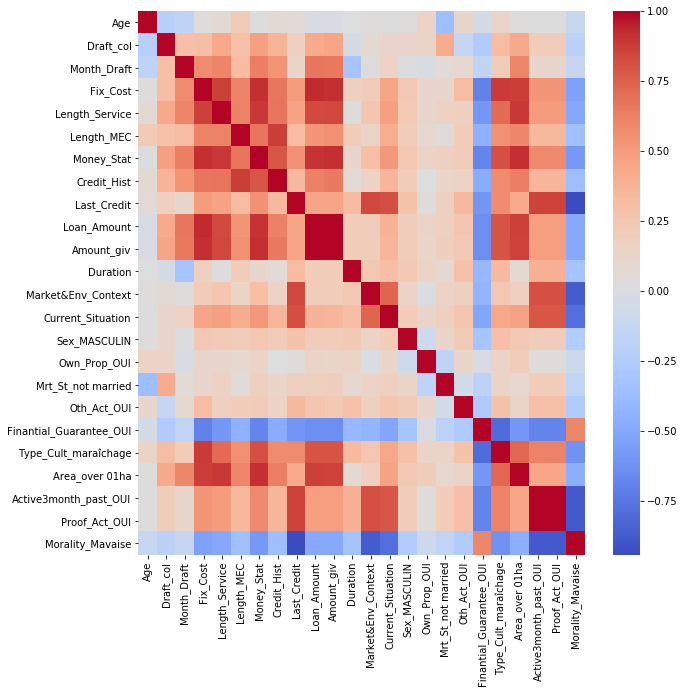

In [15]:
# @@@ Notice that the most important correlations are those with "current situation".

import matplotlib.pyplot as plt
import seaborn as sns
nc = 24
corr_0 = df_final1.corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(corr_0, annot = False, cmap = 'coolwarm', fmt = ".2f") # Creates heatmap
# @@@ The following two lines are not necessary.
#ax.add_patch(plt.Rectangle((nc//2,0),1,nc+2,fill=False,edgecolor = "black",lw=2)) # Creates border for GDP
#ax.add_patch(plt.Rectangle((0,nc//2),nc+2,1,fill=False,edgecolor = "black",lw=2)) # Creates border for GDP

# Plots heatmap
plt.show()

In [16]:
# On peut déjà à partir d'ici se faire un idée des variables les plus relevantes pour la prédiction
corr_0
corr_0["Current_Situation"]
#@@@ It is not even necessary to do the first option.  
# @@@ If you suppress 71 rows, then you only have 29 left.  This is not enough to draw
# @@@ any significant conclusion.


Age                        0.033351
Draft_col                  0.123091
Month_Draft                0.151221
Fix_Cost                   0.459277
Length_Service             0.477786
Length_MEC                 0.411865
Money_Stat                 0.517385
Credit_Hist                0.363071
Last_Credit                0.818182
Loan_Amount                0.380314
Amount_giv                 0.368856
Duration                   0.311684
Market&Env_Context         0.735907
Current_Situation          1.000000
Sex_MASCULIN               0.205933
Own_Prop_OUI               0.128212
Mrt_St_not married         0.176771
Oth_Act_OUI                0.262943
Finantial_Guarantee_OUI   -0.513079
Type_Cult_maraîchage       0.440765
Area_over 01ha             0.465650
Active3month_past_OUI      0.788581
Proof_Act_OUI              0.788581
Morality_Mavaise          -0.788581
Name: Current_Situation, dtype: float64

In [17]:
#@@@ It is not even necessary to do the first option.  
# @@@ If you suppress 71 rows, then you only have 29 left.  This is not enough to draw
# @@@ any significant conclusion.

## On crée une copie
df_final2 = df_final1.copy()

# Feature Selection

In [18]:
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      100 non-null    float64
 1   Draft_col                100 non-null    float64
 2   Month_Draft              100 non-null    float64
 3   Fix_Cost                 100 non-null    float64
 4   Length_Service           100 non-null    float64
 5   Length_MEC               100 non-null    float64
 6   Money_Stat               100 non-null    float64
 7   Credit_Hist              100 non-null    float64
 8   Last_Credit              100 non-null    int64  
 9   Loan_Amount              100 non-null    float64
 10  Amount_giv               100 non-null    float64
 11  Duration                 100 non-null    float64
 12  Market&Env_Context       100 non-null    int64  
 13  Current_Situation        100 non-null    int64  
 14  Sex_MASCULIN             10

### Application du PCA option 2

DataFrame avec les composantes principales:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.232922  1.258733 -0.057631  0.963383 -0.230962 -0.480803 -0.987680   
1  6.685261 -1.321985 -2.205128 -1.216321  0.623530  0.155727 -0.463247   
2  4.765724 -0.248140 -1.536942  0.201906 -0.607717 -0.341983  0.723310   
3  4.284083 -0.297684 -1.521847 -0.313404 -0.168290  0.405885 -0.087390   
4  3.697802  0.104716 -0.850357  0.003624 -0.168729 -0.449136 -1.256796   

        PC8  Current_Situation  
0 -0.066676                  1  
1 -0.635357                  1  
2 -0.260314                  1  
3 -0.254982                  1  
4 -0.300541                  1  


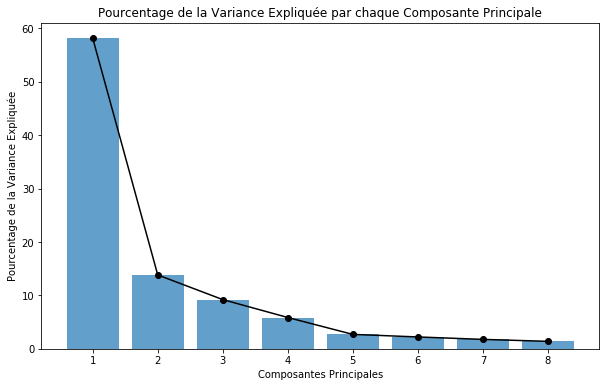

In [19]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Et que la variable cible est dans la colonne 'target'
# Séparons les caractéristiques (features) et la variable cible
features = df_final2.drop(columns=['Current_Situation'])
target = df_final2['Current_Situation']


# Application du PCA
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(features)

# Création d'un DataFrame avec les composantes principales
principal_df = pd.DataFrame(data=principal_components, 
                            columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Ajout de la variable cible au DataFrame des composantes principales
principal_df = pd.concat([principal_df, target], axis=1)

# Affichage du DataFrame avec les composantes principales
print("DataFrame avec les composantes principales:")
print(principal_df.head())

# Variance expliquée par chaque composante principale
explained_variance_ratio = pca.explained_variance_ratio_

# Affichage du graphe des pourcentages de variances expliquées
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100, alpha=0.7)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100, marker='o', linestyle = '-', color='k', label='Courbe de tendance')
plt.xlabel('Composantes Principales')
plt.ylabel('Pourcentage de la Variance Expliquée')
plt.title('Pourcentage de la Variance Expliquée par chaque Composante Principale')
plt.show()

# Autres techniques de choix de variables
### On aura donc :
* La methode Lasso et Ridge
* Régression Logistique avec coefficient 
* Stepwise 

# Lasso et Ridge

Accuracy: 0.9
Confusion Matrix:
[[47  8]
 [ 2 43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90        55
           1       0.84      0.96      0.90        45

    accuracy                           0.90       100
   macro avg       0.90      0.91      0.90       100
weighted avg       0.91      0.90      0.90       100

Coefficients du modèle Lasso:
                    Feature  Coefficient
8               Last_Credit     3.169214
19           Area_over 01ha     1.261495
6                Money_Stat     0.736997
21            Proof_Act_OUI     0.672680
20    Active3month_past_OUI     0.672680
12       Market&Env_Context     0.541657
14             Own_Prop_OUI     0.374324
2               Month_Draft     0.036995
0                       Age     0.000000
18     Type_Cult_maraîchage     0.000000
17  Finantial_Guarantee_OUI     0.000000
16              Oth_Act_OUI     0.000000
15       Mrt_St_not married     0.00

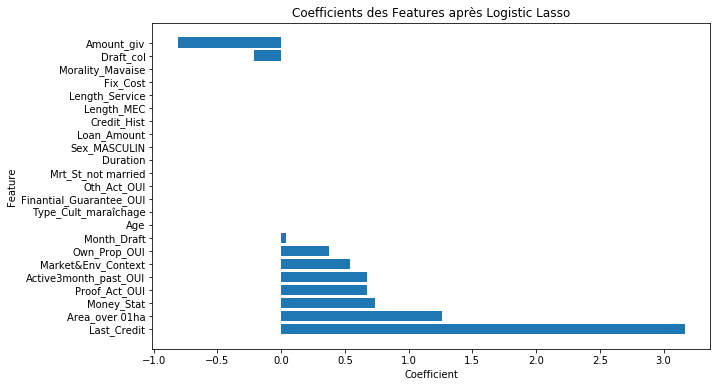

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


# Et que la variable cible est dans la colonne 'target'
# Séparons les caractéristiques (features) et la variable cible
features = df_final2.drop(columns=['Current_Situation'])
target = df_final2['Current_Situation']


# Application de la régression logistique avec pénalisation L1 (Lasso)
lasso = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)  # Utilisation de 'saga' car elle supporte L1
lasso.fit(features, target)

# Prédictions sur l'ensemble des données
y_pred = lasso.predict(features)

# Évaluation du modèle
accuracy = accuracy_score(target, y_pred)
conf_matrix = confusion_matrix(target, y_pred)
class_report = classification_report(target, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Extraction des coefficients du modèle
coefficients = pd.DataFrame({'Feature': features.columns, 'Coefficient': lasso.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Affichage des coefficients
print("Coefficients du modèle Lasso:")
print(coefficients)

# Visualisation des coefficients
plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Coefficients des Features après Logistic Lasso')
plt.show()

Coefficients du modèle Lasso:
                    Feature  Coefficient
8               Last_Credit     3.169274
19           Area_over 01ha     1.261603
6                Money_Stat     0.736933
21            Proof_Act_OUI     0.672682
20    Active3month_past_OUI     0.672682
12       Market&Env_Context     0.541658
14             Own_Prop_OUI     0.374328
2               Month_Draft     0.036999
0                       Age     0.000000
18     Type_Cult_maraîchage     0.000000
17  Finantial_Guarantee_OUI     0.000000
16              Oth_Act_OUI     0.000000
15       Mrt_St_not married     0.000000
11                 Duration     0.000000
13             Sex_MASCULIN     0.000000
9               Loan_Amount     0.000000
7               Credit_Hist     0.000000
5                Length_MEC     0.000000
4            Length_Service     0.000000
3                  Fix_Cost     0.000000
22         Morality_Mavaise     0.000000
1                 Draft_col    -0.211607
10               Amount_giv

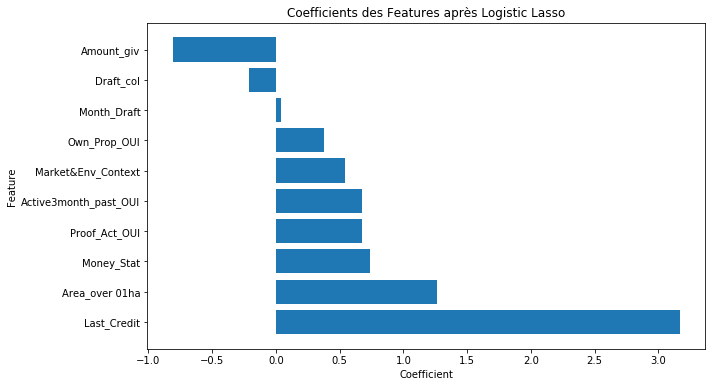

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Exemple de chargement du dataset (remplacer par votre propre jeu de données)
# data = pd.read_csv('votre_fichier.csv')


# Application de la régression logistique avec pénalisation L1 (Lasso)
lasso = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)  # Utilisation de 'saga' car elle supporte L1
lasso.fit(features, target)

# Extraction des coefficients du modèle
coefficients = pd.DataFrame({'Feature': features.columns, 'Coefficient': lasso.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Affichage des coefficients
print("Coefficients du modèle Lasso:")
print(coefficients)

# Sélection des variables pertinentes (les variables dont le coefficient est non nul)
relevant_features = coefficients[coefficients['Coefficient'] != 0]

print("Variables pertinentes sélectionnées par Logistic Lasso:")
print(relevant_features)

# Visualisation des coefficients
plt.figure(figsize=(10, 6))
plt.barh(relevant_features['Feature'], relevant_features['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Coefficients des Features après Logistic Lasso')
plt.show()


### Lasso avec Cross validation pour le choix du meilleur paramètre alpha

### Ridge Allons y!

Coefficients du modèle Ridge:
                    Feature  Coefficient
8               Last_Credit     1.590356
19           Area_over 01ha     0.948851
6                Money_Stat     0.864770
21            Proof_Act_OUI     0.806109
20    Active3month_past_OUI     0.806109
12       Market&Env_Context     0.744582
10               Amount_giv    -0.690543
5                Length_MEC     0.678018
22         Morality_Mavaise    -0.635885
14             Own_Prop_OUI     0.622408
18     Type_Cult_maraîchage    -0.573953
11                 Duration     0.552108
9               Loan_Amount    -0.421622
1                 Draft_col    -0.366189
15       Mrt_St_not married     0.356858
4            Length_Service     0.317656
3                  Fix_Cost     0.297605
7               Credit_Hist     0.251314
0                       Age    -0.233942
13             Sex_MASCULIN     0.188866
2               Month_Draft     0.188717
16              Oth_Act_OUI     0.097424
17  Finantial_Guarantee_OUI

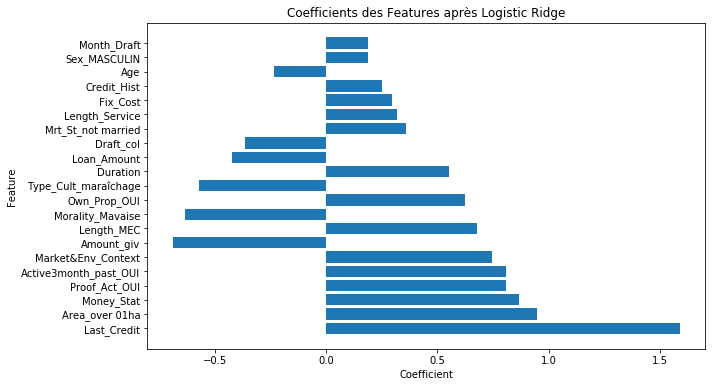

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


# Application de la régression logistique avec pénalisation L2 (Ridge)
ridge = LogisticRegression(penalty='l2', solver='saga', max_iter=10000)  # Utilisation de 'saga' car elle supporte L2
ridge.fit(features, target)

# Extraction des coefficients du modèle
coefficients = pd.DataFrame({'Feature': features.columns, 'Coefficient': ridge.coef_[0]})
coefficients['abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='abs_Coefficient', ascending=False).drop(columns=['abs_Coefficient'])

# Affichage des coefficients
print("Coefficients du modèle Ridge:")
print(coefficients)

# Sélection des variables pertinentes (les variables dont le coefficient est significatif)
# Dans le cas de Ridge, toutes les variables auront des coefficients non nuls,
# mais on peut fixer un seuil arbitraire pour sélectionner les plus significatives.
threshold = 0.1  # Par exemple, fixer un seuil de 0.1
relevant_features = coefficients[coefficients['Coefficient'].abs() > threshold]

print("Variables pertinentes sélectionnées par Logistic Ridge:")
print(relevant_features)

# Visualisation des coefficients
plt.figure(figsize=(10, 6))
plt.barh(relevant_features['Feature'], relevant_features['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Coefficients des Features après Logistic Ridge')
plt.show()

# Regression Logistique avec coefficient(Sans pénalisation)

Coefficients du modèle de régression logistique:
                    Feature  Coefficient
8               Last_Credit   387.123645
18     Type_Cult_maraîchage  -324.386573
19           Area_over 01ha   305.872682
11                 Duration   285.649243
5                Length_MEC   251.593113
12       Market&Env_Context  -193.465803
22         Morality_Mavaise  -189.075443
17  Finantial_Guarantee_OUI  -167.525166
10               Amount_giv  -137.084810
6                Money_Stat   128.782254
20    Active3month_past_OUI    96.179883
21            Proof_Act_OUI    96.179883
1                 Draft_col   -92.290437
7               Credit_Hist    90.177372
14             Own_Prop_OUI    80.894574
0                       Age    67.794175
16              Oth_Act_OUI   -67.612443
2               Month_Draft    58.626810
4            Length_Service    58.114935
15       Mrt_St_not married    55.884182
13             Sex_MASCULIN   -49.048254
9               Loan_Amount   -45.271034
3       

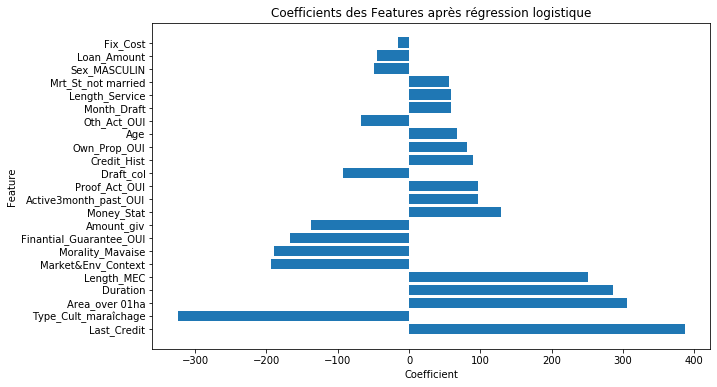

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


# Application de la régression logistique sans pénalisation
log_reg = LogisticRegression(penalty='none', solver='lbfgs', max_iter=10000)
log_reg.fit(features, target)

# Extraction des coefficients du modèle
coefficients = pd.DataFrame({'Feature': features.columns, 'Coefficient': log_reg.coef_[0]})
coefficients['abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='abs_Coefficient', ascending=False).drop(columns=['abs_Coefficient'])

# Affichage des coefficients
print("Coefficients du modèle de régression logistique:")
print(coefficients)

# Sélection des variables pertinentes (les variables dont le coefficient est significatif)
# On peut fixer un seuil arbitraire pour sélectionner les plus significatives.
threshold = 0.1  # Par exemple, fixer un seuil de 0.1
relevant_features = coefficients[coefficients['Coefficient'].abs() > threshold]

print("Variables pertinentes sélectionnées par régression logistique:")
print(relevant_features)

# Visualisation des coefficients
plt.figure(figsize=(10, 6))
plt.barh(relevant_features['Feature'], relevant_features['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Coefficients des Features après régression logistique')
plt.show()

# Forward Selection!

In [24]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [29]:
# Importations nécessaires
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import accuracy_score


# Fonction de Forward Selection
def forward_selection(X, y, estimator=None, k_features='best', scoring='accuracy'):
    """
    Applique la méthode de Forward Selection pour sélectionner les caractéristiques.
    
    :param X: DataFrame ou array des caractéristiques
    :param y: Série ou array des étiquettes (cible)
    :param estimator: Le modèle de base utilisé pour évaluer les performances des sous-ensembles de caractéristiques. 
                      Par défaut, un modèle de régression logistique est utilisé.
    :param k_features: Nombre de caractéristiques à sélectionner. 
                       'best' pour choisir automatiquement, sinon spécifier le nombre.
    :param scoring: Métrique de scoring, par défaut 'accuracy'
    
    :return: Liste des caractéristiques sélectionnées
    """
    
    # Par défaut, utiliser la régression logistique si aucun estimateur n'est spécifié
    if estimator is None:
        estimator = LogisticRegression(solver='liblinear')
    
    # Application de la sélection séquentielle avant (Forward Selection)
    sfs = SFS(estimator, 
              k_features=k_features, 
              forward=True, 
              floating=False, 
              scoring=scoring,
              cv=3,  # Validation croisée à 5 plis
              n_jobs=-1)
    
    # Ajustement du modèle sur les données
    sfs = sfs.fit(X, y)
    
    # Obtenir les indices des caractéristiques sélectionnées
    selected_features = list(sfs.k_feature_idx_)
    
    # Obtenir les noms des caractéristiques sélectionnées si X est un DataFrame
    if isinstance(X, pd.DataFrame):
        selected_features = [X.columns[i] for i in selected_features]
    
    return selected_features

# Exemple d'utilisation
if __name__ == "__main__":
    # Chargement d'un dataset d'exemple (Ici, nous utilisons un dataset de dummy)
    # Remplacez ceci par votre propre dataset
    from sklearn.datasets import load_breast_cancer
    data = load_breast_cancer()
    X = df_final2.drop(columns=['Current_Situation'])
    y = df_final2['Current_Situation']

    # Splitter les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Exécuter la sélection de caractéristiques avec Forward Selection
    selected_features = forward_selection(X_train, y_train, k_features='best', scoring='accuracy')

    # Afficher les caractéristiques sélectionnées
    print("Les caractéristiques sélectionnées sont :")
    print(selected_features)

Les caractéristiques sélectionnées sont :
['Age', 'Draft_col', 'Month_Draft', 'Length_Service', 'Length_MEC', 'Last_Credit', 'Duration']


In [26]:
df_final2.to_csv('Dataset2.csv', index= False)